In [1]:
from pyvis import network as net
import networkx as nx 
from pyvis.network import Network
import streamlit as st
from IPython.core.display import display, HTML

/var/folders/08/62tls0815g99dzrs042jfcv80000gq/T/ipykernel_38380/805922072.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [14]:

def create_html(path):
    # Load CYS data from graphml file
    graph = nx.read_graphml((path))
    # Extracting and displaying the node metadata
    node_metadata = {node: graph.nodes[node] for node in graph.nodes()}
    node_metadata_list = list(node_metadata.items())[:10]  # Displaying metadata for first 10 nodes for brevity
    # Create a Pyvis network
    net = Network(notebook=False, height="750px", width="100%")

    # Node customization settings
    special_nodes = ['BSG', 'CD44', 'EGFR', 'SLC3A2']
    # special_shape = ''  # Example shape
    special_color = '#FE81B8'  # Example color (red)
    # node_size = 15  # Adjust node size
    font_size = 14  # Adjust font size

    for node, attrs in graph.nodes(data=True):
        if attrs.get('name') in special_nodes:
            net.add_node(node, label=attrs.get('name', ''), shape='diamond', size=20, font=dict(size=font_size))
        else:
            net.add_node(node, label=attrs.get('name', ''), size=12, font=dict(size=font_size), color=special_color)

    # Add edges with hover data
    for source, target, attrs in graph.edges(data=True):
        title = "".join(attrs['name'].replace(' (interacts with) ', '_') )
        net.add_edge(source, target, title=title)

    # Set options for better visualization and enable physics initially
    # net.show_buttons(filter_=['physics'])


    # Save and display the network
    
    net.show(path.replace('.graphml', '.html').replace('graph','html'))

In [ ]:
path = 'data/graph/network_total.graphml'
create_html(path)

In [15]:
import os 

for file in os.listdir('data/graph/'):
    if file.endswith('.graphml'):
        create_html('data/graph/' + file)

## make plot

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
# read data with two level column name 
df = pd.read_csv('data/Network_GlycanList.csv', header=[0,1])
df

Pair             HM                                \
                 Pair              1              2              3   
0         BSG_SLC25A5  367927.625000  573945.019300  246457.791300   
1           BSG_LAMP1   84784.171880  142434.017400   77704.693520   
2           BSG_EPCAM   42069.628910   40153.357310   32893.695940   
3          BSG_ATP2A2   92204.390630  100291.637700  103225.212600   
4           BSG_VDAC1   21010.113280   20519.737240   11602.120720   
..                ...            ...            ...            ...   
182  SLC3A2_TNFRSF10B    4398.412109    6758.819968    2633.144597   
183      SLC3A2_ITGB1    9310.551758    9123.875195    5391.191200   
184       SLC3A2_ARF4   43868.671880   51089.893950   23152.700560   
185     SLC3A2_SLC1A5   12599.624020   13781.846750   10470.426160   
186      SLC3A2_RAB10   15481.966800   14834.201310   11040.345340   

               Und                                          Fuc  \
                 1              2              3              1   
0    259885.017000  359114.314200  151693.065200  300897.632400   
1     66681.253380   80446.264510   42947.061460   55416.850790   
2     34524.816720   32068.030760   32311.637870   33037.812610   
3     72232.813770  118154.825100   70049.288050   64356.489310   
4     13327.594600   14730.057380   11623.341770   25439.170920   
..             ...            ...            ...            ...   
182   11728.308710   19272.543290   12020.613350   11240.049840   
183    2947.307352    3110.706072    1754.882796    3432.088246   
184   28013.545370   25196.783380   23606.762560   18427.602200   
185    4723.938556    7897.811154    4636.356736    2662.484322   
186   16333.474960   20480.380920   17629.911870   13082.668830   

                                   ...            Sia                 \
                 2              3  ...              2              3   
0    446216.144000  323567.560900  ...  346329.567200  236941.317500   
1     86626.512810   48832.996410  ...  106868.767100   39946.262520   
2     30164.183670   19744.487070  ...   54647.705810   31715.704190   
3    106125.138000   34011.954100  ...  115155.134900   69693.058840   
4     38701.119500   25992.065860  ...   25713.174840   10322.429480   
..             ...            ...  ...            ...            ...   
182   13257.638780   10313.588730  ...   10607.982740    9339.726053   
183    4154.886031    2152.427279  ...    6516.685053    3874.995299   
184   30528.455740   14579.329180  ...   40679.443360   17078.765200   
185    4034.915116    1483.762575  ...    4984.511301    2475.258211   
186   11247.170400   13142.325800  ...   16405.357900    9933.040000   

            SiaFuc                                  Bait       Prey  BaitID  \
                 1              2              3    Bait       Prey  BaitID   
0    309335.216100  351652.273700  183945.567600     BSG    SLC25A5  P35613   
1     55770.558290   76125.696660   48141.480540     BSG      LAMP1  P35613   
2     33651.494450   55566.357190   20152.836830     BSG      EPCAM  P35613   
3     68540.935760   87171.047500   64958.780830     BSG     ATP2A2  P35613   
4     19932.964900   23671.193130   12633.194220     BSG      VDAC1  P35613   
..             ...            ...            ...     ...        ...     ...   
182   10832.802880   17272.579200   11129.610840  SLC3A2  TNFRSF10B  P08195   
183    6687.073528   10141.816320    4159.961571  SLC3A2      ITGB1  P08195   
184   25232.047530   40392.975610   16253.248650  SLC3A2       ARF4  P08195   
185    3110.713002    3935.114161    2661.634919  SLC3A2     SLC1A5  P08195   
186   15494.272880   22777.975620   16333.969500  SLC3A2      RAB10  P08195   

     PreyID Rank  
     PreyID Rank  
0    P05141    1  
1    P11279    1  
2    P16422    1  
3    P16615    1  
4    P21796    1  
..      ...  ...  
182  O14763    3  
183  P05556    1  
184  P18085    3  
185  Q15758    1  
186  P61026    1  

[187 rows x 21 column

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    


KeyboardInterrupt: 

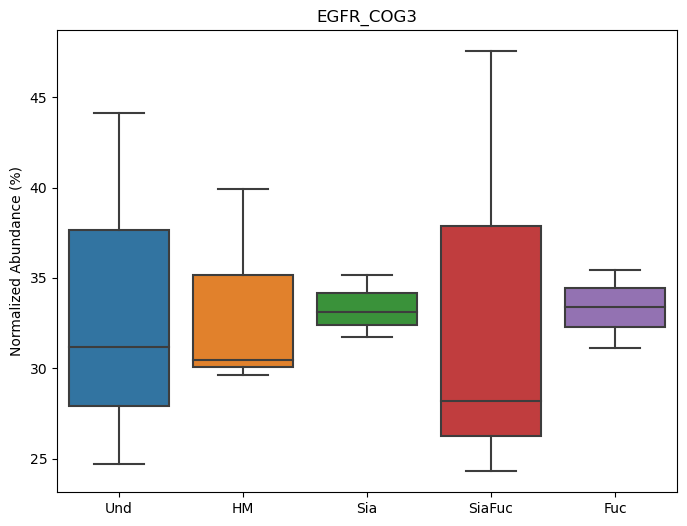

In [19]:
# get first 17th columns
df1 = df.iloc[:, :16]
for index, row in df1.iterrows():
    # Extracting the 'Pair' name and data for the row
    pair_name = row['Pair'].item()
    data = row[1:].astype(float)  # Convert data to float
    conditions_unique = set([x[0] for x in data.index ])
    
    
    # Prepare data for plotting
    plot_data = pd.DataFrame(columns=conditions_unique)
    for condition in conditions_unique:
        # Collect data for each condition
        condition_data = data[condition]
        plot_data[condition] = condition_data.values
    
    # Normalize data if needed, for example to percentage
    plot_data = plot_data / plot_data.sum() * 100
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=plot_data)
    plt.title(pair_name)
    plt.ylabel('Normalized Abundance (%)')
    
    # Save the plot as a PNG file
    # plt.show()
    # use great resolution for publication
    plt.savefig(f"data/boxplot/{pair_name}.png", dpi=800)
    plt.close()  # Close the plot to avoid displaying it in the notebook
    

